In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arcolanche.te import *

import csv

from multiprocess import Pool,cpu_count
from itertools import product

In [7]:
#No need to run this again. The output is saved in conflict_positions.

#misc_funcs.conflict_position("battles")

## To generate all initial data

In [3]:
#Run this first seperately

for dx in [1280]:
    for gridix in range(1,3):
        print(dx,gridix)
        misc_funcs.conflict_event_polygon_mapping(dx,gridix,"battles",32,"y")

1280 1
Finding event to polygon mapping!
INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Done!
1280 2
Finding event to polygon mapping!
INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Done!


In [5]:
def initial_data_generator(args):
    
    dx,gridix,conflict_type = args
    
    #print(dx,gridix)
    
    misc_funcs.single_tile_events(dx,gridix,conflict_type)
    
    ts = misc_funcs.time_series_all_polygons(1,dx,gridix,"battles")
    ts.to_csv(f"generated_data/battles/gridix_{gridix}/FG_time_series/time_series_1_{str(dx)}.csv" , index=False)
    
    return None

In [6]:
with Pool() as pool:
    output = list(pool.map(initial_data_generator , product([1280],[1,2],["battles"])))

/home/niraj/anaconda3/envs/armed_conflict/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/niraj/anaconda3/envs/armed_conflict/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/niraj/anaconda3/envs/armed_conflict/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

## To generate initial data for a single parameter group (dx,gridix,conflict_type)

In [5]:
#No need to run this again. The output is saved in event_mappings.

#misc_funcs.conflict_event_polygon_mapping(160,1,"battles",30)

In [6]:
#No need to run this again. The output is saved in 80/160/320/640.

#misc_funcs.single_tile_events(1280,0,"battles")

In [4]:
#No need to run this again. The output is saved in FG_time_series.

#dx = 1280
#gridix = 0
#ts = misc_funcs.time_series_all_polygons(1,dx,gridix,"battles")
#ts.to_csv(f"generated_data/battles/gridix_{gridix}/FG_time_series/time_series_1_{str(dx)}.csv" , index=False)

## Debugging voronoi bug

In [7]:
dx = 40
gridix = 1
conflict_type = "battles"

polygons = gpd.read_file(f'voronoi_grids/{dx}/borders{str(gridix).zfill(2)}.shp')

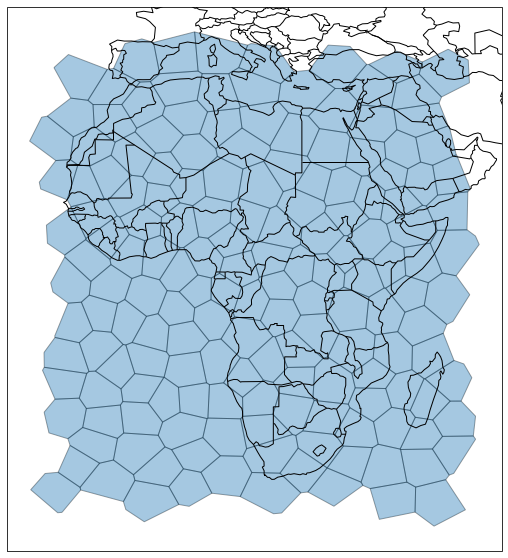

In [8]:
# create a basic map with some geographic features including coastlines and country borders
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# draw the voronoi grid
#centers.plot(ax=ax, markersize=1, alpha=.2, color='k')
polygons.plot(ax=ax, facecolor='none', edgecolor='k', alpha=.4)

# for some random pixel, color it and its neighbors
np.random.seed(0)
randpix = np.random.choice(polygons.index, size=2)

polygons.plot(ax=ax,facecolor='C0',alpha=.4)
    #polygons.iloc[polygons.iloc[i]['neighbors']].plot(ax=ax,facecolor='C1',alpha=.4)

# center the boundaries of the map about Africa
#ax.set_extent(array([0.05235987755982988+330/180*pi, 1.6406094968746698+330/180*pi,-0.5853981633974483, 0.6203047484373349])*180/pi)

In [4]:
misc_funcs.conflict_event_polygon_mapping(dx,gridix,conflict_type,15)

Finding event to polygon mapping!
INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
POINT (-10.9332 8.4642)
POINT (36.4105 15.4296)
POINT (32.0452 0.4015)
POINT (32.3056 2.7667)
POINT (36.6813 17.1522)
POINT (18.5549 4.3612)
POINT (29.0044 -2.3927)
POINT (-12.338 8.231)
POINT (-11.7047 8.1221)
POINT (18.5549 4.3612)
POINT (30.7503 28.1099)
POINT (-12.06 8.2013)
POINT (29.7267 -1.435)
POINT (29.7267 -1.435)
POINT (18.5549 4.3612)
POINT (2.9219 36.8028)
POINT (15.67 -1.03)
POINT (32.8333 30.9833)
POINT (18.5549 4.3612)
POINT (2.7894 36.6725)
POINT (30.3636 0.1358)
POINT (18.5549 4.3612)
POINT (30.0833 0.1833)
POINT (8.081200000000001 5.8086)
POINT (6.742999999999999 7.8024)
POINT (5.75 5.5167)
POINT (6 4.8333)
POINT (1.3345 36.1653)
POINT (35.0552 11.5295)
POINT (34.8719 11.2494)
POINT (34.3599 11.7898)
POINT (34.1888 10.2553)
POINT (34.6667 11.0667)
POINT (34.6667 11.0667)
POINT (34.3599 11.7898

POINT (-11.6383 7.8047)
POINT (12.1871 -5.5758)
POINT (20.8167 -7.3667)
POINT (15.2831 -4.2661)
POINT (5.75 5.5167)
POINT (-12.6833 8.2333)
POINT (-12.5745 8.1883)
POINT (-10.75 8.166700000000001)
POINT (-10.8 6.31)
POINT (-11.3455 7.8748)
POINT (-13.2356 8.4871)
POINT (-11.3082 7.3136)
POINT (-10.8644 8.1744)
POINT (14.8 -14.0666)
POINT (12.1871 -5.5758)
POINT (20.8167 -7.3667)
POINT (15.2831 -4.2661)
POINT (30.0417 0.7413999999999999)
POINT (-10.8 6.31)
POINT (-11.3082 7.3136)
POINT (12.1871 -5.5758)
POINT (30.0417 0.7413999999999999)
POINT (30.0417 0.7413999999999999)
POINT (20.8167 -7.3667)
POINT (21.4666 -7.8)
POINT (17.8333 -8.75)
POINT (21.4666 -7.8)
POINT (19.9833 -7.15)
POINT (19.9833 -7.15)
POINT (-10.8 6.31)
POINT (-10.8 6.31)
POINT (30.0417 0.7413999999999999)
POINT (20.8167 -7.3667)
POINT (12.1871 -5.5758)
POINT (-10.8 6.31)
POINT (29.391 -3.0804)
POINT (29.391 -3.0804)
POINT (29.6813 -3.4022)
POINT (20.8167 -7.3667)
POINT (30.0417 0.7413999999999999)
POINT (12.1871 -5.575

POINT (11.85 -4.79)
POINT (-11.4045 7.0909)
POINT (-11.1039 7.9538)
POINT (-11.3642 9.5398)
POINT (-13.0719 8.3383)
POINT (-13.1806 8.2849)
POINT (-13.2356 8.4871)
POINT (-13.0697 8.336399999999999)
POINT (31.6178 4.8609)
POINT (-10.9332 8.4642)
POINT (-11.3082 7.3136)
POINT (11.85 -4.79)
POINT (33.5829 4.7762)
POINT (7.89 15.63)
POINT (29.85 0.3667)
POINT (34.4667 -1.0667)
POINT (31.4983 2.4634)
POINT (34.75 -0.1)
POINT (-11.1039 7.9538)
POINT (-13.2356 8.4871)
POINT (10.85 9.416700000000001)
POINT (15.06 -4.45)
POINT (29.6034 -4.3468)
POINT (29.7587 -4.4221)
POINT (29.673 -4.4068)
POINT (29.3869 -3.5278)
POINT (28.2833 -15.4166)
POINT (-16.17 12.5)
POINT (-16.17 12.5)
POINT (16.0833 8.566700000000001)
POINT (35.7667 13.5167)
POINT (34.4667 -1.0667)
POINT (16.0833 8.566700000000001)
POINT (-11.1039 7.9538)
POINT (39.4521 -4.1738)
POINT (-13.2356 8.4871)
POINT (-13.0697 8.336399999999999)
POINT (-13.0719 8.3383)
POINT (-11.3082 7.3136)
POINT (29.5426 -3.8198)
POINT (-11.6536 7.5723)
PO

POINT (42.6166 -0.25)
POINT (15.2666 -7.7833)
POINT (-10.5667 8.283300000000001)
POINT (-10.5667 8.283300000000001)
POINT (-10.706 8.3969)
POINT (29.7738 -1.8266)
POINT (-10.9386 8.563700000000001)
POINT (-11.1899 7.8767)
POINT (42.5463 -0.3603)
POINT (29.55 0.4333)
POINT (11.85 -4.79)
POINT (-11.0833 9.533300000000001)
POINT (13.95 -13.5666)
POINT (29.8961 -3.5744)
POINT (29.7244 -1.5291)
POINT (36.4105 15.4296)
POINT (13.95 -13.5666)
POINT (43.6469 3.1172)
POINT (29.4654 0.4966)
POINT (-11.3221 9.8543)
POINT (36.4105 15.4296)
POINT (31.6178 4.8609)
POINT (31.6178 4.8609)
POINT (29.4654 0.4966)
POINT (-9.98 8.43)
POINT (13.76 -4.22)
POINT (34.3 1.3333)
POINT (34.35 1.4)
POINT (34.35 1.4)
POINT (29.813 -1.488)
POINT (15.05 -13.1)
POINT (29.6358 -1.6291)
POINT (34.2895 10.559)
POINT (31.6178 4.8609)
POINT (29.7094 -1.4405)
POINT (-15.6166 12.4833)
POINT (34.3 1.3333)
POINT (34.175 1.0806)
POINT (29.7294 11.0142)
POINT (31.7333 10.9833)
POINT (36.4105 15.4296)
POINT (29.7294 11.0142)
POI

POINT (29.3505 -1.6947)
POINT (29.4091 -3.1914)
POINT (29.8333 -4.2833)
POINT (30.25 1.5667)
POINT (13.45 -5.8373)
POINT (28.8167 -1.4)
POINT (29.4654 0.4966)
POINT (29.291 0.142)
POINT (23 -11.6)
POINT (-12.3461 9.1943)
POINT (-10.8427 7.9918)
POINT (1.2215 6.1287)
POINT (40.06 1.75)
POINT (27.4833 -29.3167)
POINT (14.0333 -5.7)
POINT (4.5667 7.4667)
POINT (31.0451 9.474399999999999)
POINT (30.3257 -2.9045)
POINT (15.3222 -4.325)
POINT (14.8667 -5.25)
POINT (29.6983 -1.3539)
POINT (30.1326 8.2936)
POINT (40.06 1.75)
POINT (13.45 -5.8373)
POINT (29.7645 -7.0394)
POINT (15.3222 -4.325)
POINT (22.6333 -10.9)
POINT (12.1871 -5.5758)
POINT (29.2339 -1.6933)
POINT (29.7883 9.2525)
POINT (12.4666 -5.9666)
POINT (31.02 9.49)
POINT (-12.6021 9.303100000000001)
POINT (12.3715 -5.9275)
POINT (5.5591 5.1819)
POINT (31.3833 3.4833)
POINT (13.45 -5.8373)
POINT (15.3222 -4.325)
POINT (15.3222 -4.325)
POINT (15.3222 -4.325)
POINT (25.1896 0.5147)
POINT (15.3222 -4.325)
POINT (29.1785 -5.937)
POINT (1

POINT (26.9167 -6.05)
POINT (16.7 -11.4833)
POINT (17.0833 -12.0333)
POINT (17.1166 -12.3166)
POINT (5.2215 7.621)
POINT (16.9333 -12.3833)
POINT (15.7391 -12.7761)
POINT (31.4 11.9167)
POINT (5.75 5.5167)
POINT (26.9167 -6.05)
POINT (17.1166 -12.3166)
POINT (17.4833 -12.0166)
POINT (31.4 11.9167)
POINT (21.5167 2.15)
POINT (16.9333 -12.3833)
POINT (17.0833 -12.0333)
POINT (-13.0181 8.6889)
POINT (16.7 -11.4833)
POINT (-12.5336 8.683299999999999)
POINT (-11.9074 8.660500000000001)
POINT (29.7833 -7.7)
POINT (29.1785 -5.937)
POINT (14.66 -4.66)
POINT (17.1166 -12.3166)
POINT (15.8666 -12.2)
POINT (16.7 -11.4833)
POINT (31.4 11.9167)
POINT (17.2833 -12.15)
POINT (31.4 11.9167)
POINT (17.0833 -12.0333)
POINT (17.1166 -12.3166)
POINT (15.8666 -12.2)
POINT (17.2833 -12.15)
POINT (17.2833 -12.15)
POINT (13.15 -9.35)
POINT (15.05 -10.85)
POINT (31.4 11.9167)
POINT (17.4833 -12.0166)
POINT (17.4833 -12.0166)
POINT (17.0833 -12.0333)
POINT (16.9333 -12.3833)
POINT (17.2166 -12.2666)
POINT (17.0

POINT (29.1378 -3.3953)
POINT (16.3452 -9.544700000000001)
POINT (14.25 -6.2666)
POINT (15.0833 -7.2666)
POINT (29.85 0.0333)
POINT (30.0833 0.1833)
POINT (30.0833 0.1833)
POINT (29.85 0.0333)
POINT (33.7148 9.958600000000001)
POINT (15.7391 -12.7761)
POINT (12.67 -4.2)
POINT (16.3452 -9.544700000000001)
POINT (14.25 -6.2666)
POINT (34.8667 3.7167)
POINT (22.4454 13.4413)
POINT (15.0833 -7.2666)
POINT (34.867 3.717)
POINT (30.0833 0.1833)
POINT (18 -8.6)
POINT (18.05 -9.1333)
POINT (43.6469 3.1172)
POINT (-11.7677 9.3901)
POINT (16.3452 -9.544700000000001)
POINT (16.3475 -9.6244)
POINT (16.9666 -11.4666)
POINT (16.9666 -11.4666)
POINT (15.0833 -7.2666)
POINT (-11.75 9.045199999999999)
POINT (15.7391 -12.7761)
POINT (17.2833 -12.15)
POINT (15.7391 -12.7761)
POINT (16.3452 -9.544700000000001)
POINT (8.5044 11.9702)
POINT (14.25 -6.2666)
POINT (16.3452 -9.544700000000001)
POINT (30.0667 0.6833)
POINT (32.5656 0.3156)
POINT (15.7391 -12.7761)
POINT (15.7391 -12.7761)
POINT (25.7458 -5.3838

POINT (14.75 -12.95)
POINT (16.7833 -12.2333)
POINT (15.7391 -12.7761)
POINT (16.3452 -9.544700000000001)
POINT (16.9333 -12.3833)
POINT (17.2166 -12.2666)
POINT (16.7833 -12.2333)
POINT (6.8902 6.3224)
POINT (-12.2137 8.466100000000001)
POINT (-16.13 12.45)
POINT (39.3667 14.8333)
POINT (36.9992 15.9064)
POINT (36.9992 15.9064)
POINT (16.9333 -12.3833)
POINT (41.5877 -1.6375)
POINT (36.4105 15.4296)
POINT (-10.8427 7.9918)
POINT (-12.2137 8.466100000000001)
POINT (-12.2153 8.4657)
POINT (32.5303 15.6365)
POINT (16.3452 -9.544700000000001)
POINT (-12.7691 8.7331)
POINT (-12.9977 8.9758)
POINT (29.8776 0.3552)
POINT (15.7391 -12.7761)
POINT (32.5303 15.6365)
POINT (16.3452 -9.544700000000001)
POINT (16.9333 -12.3833)
POINT (29.8776 0.3552)
POINT (13.76 -4.22)
POINT (11.85 -4.79)
POINT (-12.7577 8.4903)
POINT (16.3452 -9.544700000000001)
POINT (16.9333 -12.3833)
POINT (13.9741 -12.0088)
POINT (-12.2723 8.2476)
POINT (16.9333 -12.3833)
POINT (26.5167 -4.7166)
POINT (26.5167 -4.7166)
POINT

POINT (23.1113 -5.5489)
POINT (15.2831 -4.2661)
POINT (23.1113 -5.5489)
POINT (40.8723 0.3534)
POINT (30.4428 -3.5303)
POINT (16.3452 -9.544700000000001)
POINT (29.7883 9.2525)
POINT (-11.1595 8.888299999999999)
POINT (-13.1154 8.9381)
POINT (-13.1154 8.9381)
POINT (34.6575 2.5329)
POINT (33.0023 7.779)
POINT (23.6 -6.15)
POINT (24.4833 -6.1333)
POINT (36.4105 15.4296)
POINT (16.3452 -9.544700000000001)
POINT (24.4833 -6.1333)
POINT (16.3452 -9.544700000000001)
POINT (29.7883 9.2525)
POINT (24.4833 -6.1333)
POINT (29.7883 9.2525)
POINT (16.3452 -9.544700000000001)
POINT (19.7667 3.25)
POINT (21.0028 4.279)
POINT (27.6833 3.9333)
POINT (29.55 0.4333)
POINT (16.3452 -9.544700000000001)
POINT (29.7883 9.2525)
POINT (23.1113 -5.5489)
POINT (14.6333 -13.0166)
POINT (14.25 -13.0333)
POINT (14.4333 -13.8667)
POINT (14.65 -7.4333)
POINT (16 -7.3166)
POINT (16.3452 -9.544700000000001)
POINT (14.7666 -12.35)
POINT (28.8667 -2.5)
POINT (16.3452 -9.544700000000001)
POINT (45.3337 2.0414)
POINT (21

POINT (29.3747 -3.4158)
POINT (29.358 -3.3772)
POINT (22.6666 -17.5)
POINT (29.1378 -3.3953)
POINT (15.7391 -12.7761)
POINT (23.75 -4.2333)
POINT (23.75 -4.2333)
POINT (16.3 -14.4666)
POINT (22.6666 -17.5)
POINT (15.7391 -12.7761)
POINT (22.3167 -0.6833)
POINT (15.7391 -12.7761)
POINT (22.6666 -17.5)
POINT (16.3452 -9.544700000000001)
POINT (16.3 -14.4666)
POINT (29.38 -3.3663)
POINT (31.2109 30.0081)
POINT (3.8336 36.535)
POINT (22.6666 -17.5)
POINT (15.7391 -12.7761)
POINT (16.3 -14.4666)
POINT (16.3 -14.4666)
POINT (39.6461 -0.4536)
POINT (29.5111 -3.3276)
POINT (16.3452 -9.544700000000001)
POINT (34.1166 2.9833)
POINT (-10.7136 8.6149)
POINT (32.01 2.64)
POINT (22.6666 -17.5)
POINT (45.3337 2.0414)
POINT (16.3452 -9.544700000000001)
POINT (16.3 -14.4666)
POINT (35.85 -0.1666)
POINT (34.6575 2.5329)
POINT (15.7391 -12.7761)
POINT (23.35 3.0167)
POINT (22.3167 -0.6833)
POINT (32.5656 0.3156)
POINT (15.7391 -12.7761)
POINT (10.1167 7.3833)
POINT (34.4333 2.8167)
POINT (16.3452 -9.5447

POINT (18.4 2.7167)
POINT (14.9333 -7.1666)
POINT (16.2166 -6.5166)
POINT (16.35 -8.033300000000001)
POINT (14.3 -7.0166)
POINT (16.7 -11.4833)
POINT (16.7 -11.4833)
POINT (30.0417 0.7413999999999999)
POINT (3.042 36.7525)
POINT (19.2 0.4833)
POINT (18.7224 3.5382)
POINT (18.1833 2.3167)
POINT (20.1 1.2667)
POINT (18.15 2.2333)
POINT (16.118 -1.2886)
POINT (39.6461 -0.4536)
POINT (14.9333 -7.1666)
POINT (16.2166 -6.5166)
POINT (16.35 -8.033300000000001)
POINT (14.3 -7.0166)
POINT (17.4275 21.8375)
POINT (20.1 1.2667)
POINT (19.9667 4.55)
POINT (21.4167 -0.7166)
POINT (18.1833 2.3167)
POINT (23.4833 -1.3166)
POINT (23.6059 -5.6499)
POINT (18.15 2.2333)
POINT (23.6059 -5.6499)
POINT (19.2 0.4833)
POINT (18.7224 3.5382)
POINT (19.35 4.1167)
POINT (6 4.8333)
POINT (14.9333 -7.1666)
POINT (16.2166 -6.5166)
POINT (16.35 -8.033300000000001)
POINT (14.3 -7.0166)
POINT (35.25 1.4167)
POINT (29.4082 -3.4148)
POINT (29.4225 -3.3561)
POINT (23.4833 -1.3166)
POINT (18.15 2.2333)
POINT (18.7224 3.53

POINT (-16.2666 12.5833)
POINT (21.2333 -17.95)
POINT (35.5322 2.5775)
POINT (-16.43 12.45)
POINT (-16.2666 12.5833)
POINT (-15.93 13.92)
POINT (21.2333 -17.95)
POINT (29.37 -3.4168)
POINT (7.4383 10.5222)
POINT (7.9541 9.8734)
POINT (7.4383 10.5222)
POINT (44.53 1.7878)
POINT (3.4779 36.6248)
POINT (-14.87 12.82)
POINT (7.4383 10.5222)
POINT (7.9541 9.8734)
POINT (32.8867 3.2783)
POINT (35.5 2.7588)
POINT (-17.2709 14.725)


IndexError: index 0 is out of bounds for axis 0 with size 0

# Generating avalanches

In [2]:
def loop_wrapper_st(args):
    dx , time , gridix = args
    ts = misc_funcs.time_series_all_polygons(time,dx,gridix,"battles")
    a,b = misc_funcs.avalanche_creation_fast_st(ts,time,dx,gridix,"battles")
    return a

In [3]:
def loop_wrapper_te(args):
    dx , time , gridix = args
    a,b,c = misc_funcs.avalanche_creation_fast_te(time,dx,gridix,"battles","data")
    return a

In [4]:
dx_time = list(product([40,80,160,320,640],[2,4,8,16,32,64,128,256,512],[1,2,3,4,5,6,7,8,9]))
#dx_time = list(product([40,80],[32,64],[1,2]))

In [7]:
for algo_type in ["te","st"]:
    if(algo_type == "te"):
        with Pool() as pool:
            output = list(pool.map(loop_wrapper_te , dx_time))
        
        for i in range(len(dx_time)):
            ava_list = output[i]
            
            with open(f"avalanches/battles/gridix_{dx_time[i][2]}/{algo_type}/{algo_type}_ava_box_{dx_time[i][1]}_{dx_time[i][0]}.csv","w") as f:
                wr = csv.writer(f)
                wr.writerows(output[i])        
    elif(algo_type == "st"):
        with Pool() as pool:
            output = list(pool.map(loop_wrapper_st , dx_time))
            
        for i in range(len(dx_time)):
            ava_list = output[i]
            
            with open(f"avalanches/battles/gridix_{dx_time[i][2]}/{algo_type}/{algo_type}_ava_box_{dx_time[i][1]}_{dx_time[i][0]}.csv","w") as f:
                wr = csv.writer(f)
                wr.writerows(output[i])

Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!
Shuffle Number: Shuffle Number:0
 0
Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!
Shuffle Number:Shuffle Number: 0
 Calculating transfer entropy between tiles!
Shuffle Number: 0
Shuffle Number: 0
0Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!

Calculating transfer entropy between tiles!Calculating transfer entropy between tiles!

Calculating transfer entropy between tiles!Shuffle Number: 0

Shuffle Number: 0
Shuffle Number:Shuffle Number:Shuffle Number:  00 
0
Calculating transfer entropy between tiles!
Calculating transfer entropy between tiles!

Shuffle Number: Shuffle Number:0 
Calculating transfer entropy between tiles!
0Calculating transfer entropy between tiles!

Calculating transfer entropy between tiles!Calculating transfer entropy between tiles!

Shuffle Number:Shu

Process ForkPoolWorker-25:
Process ForkPoolWorker-16:
Process ForkPoolWorker-31:
Process ForkPoolWorker-23:
Process ForkPoolWorker-27:
Process ForkPoolWorker-29:
Process ForkPoolWorker-28:
Process ForkPoolWorker-24:
Process ForkPoolWorker-32:
Process ForkPoolWorker-22:
Process ForkPoolWorker-26:
Process ForkPoolWorker-30:
Process ForkPoolWorker-21:
Process ForkPoolWorker-17:
Process ForkPoolWorker-18:
Process ForkPoolWorker-13:
Process ForkPoolWorker-15:
Process ForkPoolWorker-12:
Process ForkPoolWorker-10:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):


KeyboardInterrupt: 

## Box to Event ava conversion

In [ ]:
def box_to_event(args):
    dx , time , gridix = args
    
    box_path = f"avalanches/battles/gridix_{gridix}/{algo_type}/{algo_type}_ava_box_{str(time)}_{str(dx)}.csv"
    box_ava = misc_funcs.extract_box_ava_from_file(box_path)
    
    ts_FG = pd.read_csv(f"generated_data/battles/gridix_{gridix}/FG_time_series/time_series_1_{str(dx)}.csv")
    data_bin = misc_funcs.data_bin_extracter(ts_FG,time)
    
    event_ava = misc_funcs.boxAva_to_eventAva(box_ava,data_bin)
    
    return event_ava

In [ ]:
for algo_type in ["te","st"]:
    with Pool() as pool:
        output = list(pool.map(box_to_event , dx_time))
        
    for i in range(len(dx_time)):
        ava_list = output[i]
        
        with open(f"avalanches/battles/gridix_{dx_time[i][2]}/{algo_type}/{algo_type}_ava_event_{dx_time[i][1]}_{dx_time[i][0]}.csv","w") as f:
            wr = csv.writer(f)
            wr.writerows(output[i])    

## Analysis

In [10]:
time = 64
dx = 320
type_of_algo = "te"
conflict_type = "battles"
gridix = 2

In [12]:
event_path = f"avalanches/battles/gridix_{gridix}/{type_of_algo}/{type_of_algo}_ava_event_{str(time)}_{str(dx)}.csv"
avalanche_data = misc_funcs.ava_numbering(time,dx,gridix,conflict_type,event_path)

Creating final data table!
Creating time bins!
Done!


/home/niraj/anaconda3/envs/armed_conflict/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Done!


In [13]:
parameter_of_interest = input("f/r/du/s/di: " )

if(parameter_of_interest == "f"):
    dt = ava_parameter_functions.fatalities(avalanche_data) #For getting frequency distribution
    xlabel = "Fatalities"
elif(parameter_of_interest == "r"):
    dt = ava_parameter_functions.reports(avalanche_data) #For getting frequency distribution
    xlabel = "Reports"
elif(parameter_of_interest == "du"):
    dt = ava_parameter_functions.duration(avalanche_data) #For getting frequency distribution
    xlabel = "Duration"
elif(parameter_of_interest == "s"):
    dt = ava_parameter_functions.sites(avalanche_data) #For getting frequency distribution
    xlabel = "Sites"
elif(parameter_of_interest == "di"):
    diameter_type = input("centers(c)/events(e): ")
    cen = []
    for i in range(len(polygons)):
        centroid = Point(polygons["geometry"].iloc[i].centroid.coords)
        cen.append(centroid)
    centers = gpd.GeoSeries(cen)
    if(diameter_type == "c"):
        xlabel = "Diameter (Using Centers)"
        dt = ava_parameter_functions.diameter_centers(avalanche_data,centers)
    elif(diameter_type == "e"):
        xlabel = "Diameter (Using event distance)"
        dt = ava_parameter_functions.diameter_events(avalanche_data,centers,data)

f/r/du/s/di: s


Text(0.5, 1.0, '64,320')

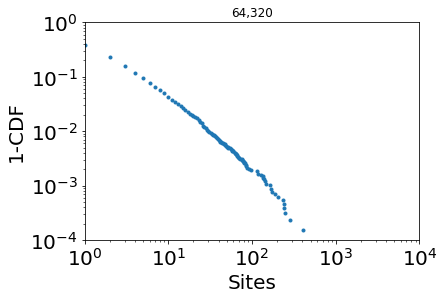

In [14]:
#For discrete quantities

dt1 = np.bincount(dt)      #For getting frequency distribution
dt1 = dt1/dt1.sum()             #For Normalization
dt1[dt1 == 0] = np.nan
dt1 = pd.DataFrame(dt1)
dt1 = dt1.cumsum(skipna=True)           #To get commulaative distribution
dt1 = (1-dt1)                    #To get complimentary commulative distribution
dt1 = dt1[0]

plt.scatter(np.arange(1 , dt1.size-1) , dt1[1:-1] , marker='.')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([10**-4 , 10**0])
ax.set_xlim([10**0 , 10**4])

plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

plt.xlabel(xlabel , fontsize=20)
plt.ylabel("1-CDF" , fontsize=20)

plt.title(f"{str(time)},{str(dx)}")

#plt.savefig(f"{conflict_type}_{parameter_of_interest}_{str(dx)}_{str(time)}.png")

#plt.xscale("linear")
#plt.yscale("linear")
#plt.xlim((0,max(dt)))

(2.0792265810882657, 2, 0.011346385452941428)

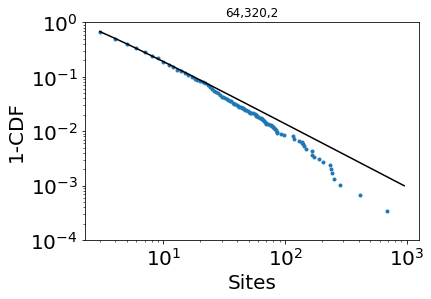

In [16]:
alpha,xmin,ks = power_law_func.power_law_fitting_discrete(time, dx, gridix , dt, xlabel , "y" , "n")
#plt.ylim([0,1])
alpha,xmin,ks

In [ ]:
#For continous quantities

dt1 = dt[dt != 0]
dt1 = np.unique(dt1)
dt1 = np.array(dt1)
x = np.sort(dt1)
y = 1 - (np.arange(len(dt1)) / float(len(dt1)))

#plt.scatter(np.log(np.arange(dt.size)) , np.log(dt) , marker='.')

plt.scatter(x , y , marker='.')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_ylim([10**-4 , 10**0])
#ax.set_xlim([10**0 , 10**4])

plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)

plt.xlabel(xlabel , fontsize=20)
plt.ylabel("1-CDF" , fontsize=20)

plt.title(f"{str(time)},{str(dx)}")

#plt.savefig(f"{conflict_type}_{parameter_of_interest}_{str(dx)}_{str(time)}.png")

In [ ]:
power_law_func.power_law_fitting_continuous(time , dx , dt,xlabel , "y" , "n")
#plt.ylim([0,1])

## Debugging avalanche creation code

In [2]:
type_of_events = "data"

time = 64
dx = 160
algo_type = "te"
gridix = 2

dtdx = (time,dx)

In [3]:
if(type_of_events == "null"):
    time_series , time_series_FG = null_model_time_series_generator(time,640,dx,conflict_type)
elif(type_of_events == "data"):
    # load polygons
    polygons = gpd.read_file(f'voronoi_grids/{dtdx[1]}/borders{str(gridix).zfill(2)}.shp')
    def neighbors_to_list(neighbor_list):
        return list(map(int , neighbor_list.replace(' ', '').split(',')))
    neighbor_info_df = polygons.drop('geometry' , axis=1)
    neighbor_info_df['neighbors'] = neighbor_info_df['neighbors'].apply(neighbors_to_list)

    time_series_FG = pd.read_csv(f'generated_data/battles/gridix_{gridix}/FG_time_series/time_series_1_{dtdx[1]}.csv')
    time_series = CG_time_series_fast(time_series_FG.values, dtdx[0])
    time_series = pd.DataFrame(time_series, columns=time_series_FG.columns.astype(int) , index=range(1,len(time_series)+1))


#polygons_TE , neighbor_info_dataframe , list_of_tuples_tile = neighbor_finder_TE(time_series , time , dx , gridix , conflict_type)

# Calculate transfer entropies and shuffles for pairs and self

self_poly_te = net.self_links(time_series)
pair_poly_te = net.links(time_series, neighbor_info_df)

G = net.CausalGraph(self_poly_te,pair_poly_te)

neighbors = [list(G.neighbors(n)) for n in G.nodes]

AttributeError: 'CausalGraph' object has no attribute 'nodes'

In [5]:
pair_poly_te

{(154, 161): (0.01015072432660666,
  [0.0055687768130127735,
   0.016108069004716508,
   0.031564601827564695,
   0.0017447689980133719,
   0.009902894199457583,
   0.04031874735898017,
   0.0232692415380749,
   0.003374751867786147,
   0.0079611875823374,
   0.006405858800384774,
   0.031949948585114706,
   0.03180634267867286,
   0.014132252149129403,
   0.0004080833545827134,
   0.0005564759969673998,
   0.001524880457772449,
   0.019313272248179875,
   0.009258207117152542,
   0.003365253182032779,
   0.0033383565916180694,
   0.002628428494295622,
   0.010513833381777419,
   0.03137372260508378,
   0.034391812821889675,
   0.014857711028796452,
   0.0004080833545827134,
   0.009210383113092656,
   0.02098770286488203,
   0.03589362601058123,
   0.03716486784800867,
   0.008932024551887496,
   0.00016039128264205903,
   0.009769573222142593,
   0.006405858800384774,
   0.005914686307130123,
   0.0006796113565803248,
   0.0023698826379419885,
   0.005500157713982,
   0.0094942514452